<a href="https://www.kaggle.com/code/lalit7881/e-commerce-customer-segmentation-acc-91-85?scriptVersionId=300181393" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-customer-classification-dataset/retail_customer_segmentation.csv


In [2]:
df = pd.read_csv("/kaggle/input/online-retail-customer-classification-dataset/retail_customer_segmentation.csv")

In [3]:
df.head()

,customer_id,age,annual_income,months_active,avg_monthly_spend,purchase_frequency,avg_order_value,discount_usage_rate,return_rate,browsing_time_minutes,support_interactions,payment_method,region,customer_segment
0,33554,53,100473.211709,63,121.430565,0.817268,66.820403,0.117256,0.023144,77.298393,2.0,Card,Semi-Urban,Occasional
1,9428,54,54730.644845,67,572.552674,3.176551,137.087449,0.261647,0.429054,92.132565,2.0,Wallet,Urban,Occasional
2,200,44,58268.121079,57,266.593896,2.713168,71.796888,0.284785,0.011854,155.194768,1.0,UPI,Rural,Occasional
3,12448,54,64829.795654,40,691.452358,5.553977,105.501185,0.104832,0.399686,113.917756,0.0,Wallet,Rural,High_Value
4,39490,28,27431.467873,15,832.664792,1.348389,354.568534,0.409204,0.039517,50.123656,1.0,Card,Semi-Urban,Occasional


In [4]:
df.tail()

,customer_id,age,annual_income,months_active,avg_monthly_spend,purchase_frequency,avg_order_value,discount_usage_rate,return_rate,browsing_time_minutes,support_interactions,payment_method,region,customer_segment
49995,11285,47,37585.093531,15,NaN,NaN,82.879201,0.418159,0.019328,23.362726,0.0,Wallet,Urban,Regular
49996,44733,70,65317.864921,52,189.460191,6.344533,25.796084,0.356601,0.093165,121.685925,0.0,UPI,Urban,High_Value
49997,38159,33,68598.241873,66,479.916382,6.398458,64.867082,0.271167,0.097796,80.782206,2.0,Wallet,Rural,High_Value
49998,861,27,NaN,38,50.048754,2.885955,12.879397,0.619895,0.352844,64.868892,1.0,Card,Urban,Regular
49999,15796,34,18890.930175,44,684.482301,3.897431,139.763540,0.527581,NaN,47.239857,NaN,Card,Urban,Regular


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            50000 non-null  int64  
 1   age                    50000 non-null  int64  
 2   annual_income          46925 non-null  float64
 3   months_active          50000 non-null  int64  
 4   avg_monthly_spend      47480 non-null  float64
 5   purchase_frequency     48021 non-null  float64
 6   avg_order_value        50000 non-null  float64
 7   discount_usage_rate    47451 non-null  float64
 8   return_rate            47513 non-null  float64
 9   browsing_time_minutes  46066 non-null  float64
 10  support_interactions   48012 non-null  float64
 11  payment_method         50000 non-null  object 
 12  region                 50000 non-null  object 
 13  customer_segment       50000 non-null  object 
dtypes: float64(8), int64(3), object(3)
memory usage: 5.3+ 

In [6]:
df.describe()

,customer_id,age,annual_income,months_active,avg_monthly_spend,purchase_frequency,avg_order_value,discount_usage_rate,return_rate,browsing_time_minutes,support_interactions
count,50000.000000,50000.000000,46925.000000,50000.000000,47480.000000,48021.000000,50000.000000,47451.000000,47513.000000,46066.000000,48012.000000
mean,25000.500000,44.002820,44542.620904,36.477480,337.294238,4.910841,77.375915,0.284358,0.148964,61.781329,1.494606
std,14433.901067,15.269871,30537.946035,20.787197,204.627095,3.416115,70.531793,0.159236,0.110508,41.743394,1.221280
min,1.000000,18.000000,2946.317892,1.000000,8.072298,0.017013,0.940393,0.000534,0.000050,0.236109,0.000000
25%,12500.750000,31.000000,24373.244554,18.000000,192.074544,2.456867,32.018468,0.160497,0.063938,31.082283,1.000000
50%,25000.500000,44.000000,36787.730010,36.000000,297.477404,4.158673,56.600351,0.262591,0.123628,52.679175,1.000000
75%,37500.250000,57.000000,55497.245522,55.000000,439.112361,6.526903,98.832037,0.387640,0.209612,82.549571,2.000000
max,50000.000000,70.000000,530788.317921,72.000000,3026.342238,67.682528,1289.427328,0.934655,0.830395,406.813006,9.000000


In [7]:
df.dtypes

customer_id                int64
age                        int64
annual_income            float64
months_active              int64
avg_monthly_spend        float64
purchase_frequency       float64
avg_order_value          float64
discount_usage_rate      float64
return_rate              float64
browsing_time_minutes    float64
support_interactions     float64
payment_method            object
region                    object
customer_segment          object
dtype: object

In [8]:
df.shape

(50000, 14)

In [9]:
df.isnull().sum()

customer_id                 0
age                         0
annual_income            3075
months_active               0
avg_monthly_spend        2520
purchase_frequency       1979
avg_order_value             0
discount_usage_rate      2549
return_rate              2487
browsing_time_minutes    3934
support_interactions     1988
payment_method              0
region                      0
customer_segment            0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['customer_id', 'age', 'annual_income', 'months_active',
       'avg_monthly_spend', 'purchase_frequency', 'avg_order_value',
       'discount_usage_rate', 'return_rate', 'browsing_time_minutes',
       'support_interactions', 'payment_method', 'region', 'customer_segment'],
      dtype='object')

In [12]:
df.nunique()

customer_id              50000
age                         53
annual_income            46925
months_active               72
avg_monthly_spend        47480
purchase_frequency       48021
avg_order_value          50000
discount_usage_rate      47451
return_rate              47513
browsing_time_minutes    46066
support_interactions        10
payment_method               3
region                       3
customer_segment             4
dtype: int64

## EDA

In [13]:
# Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

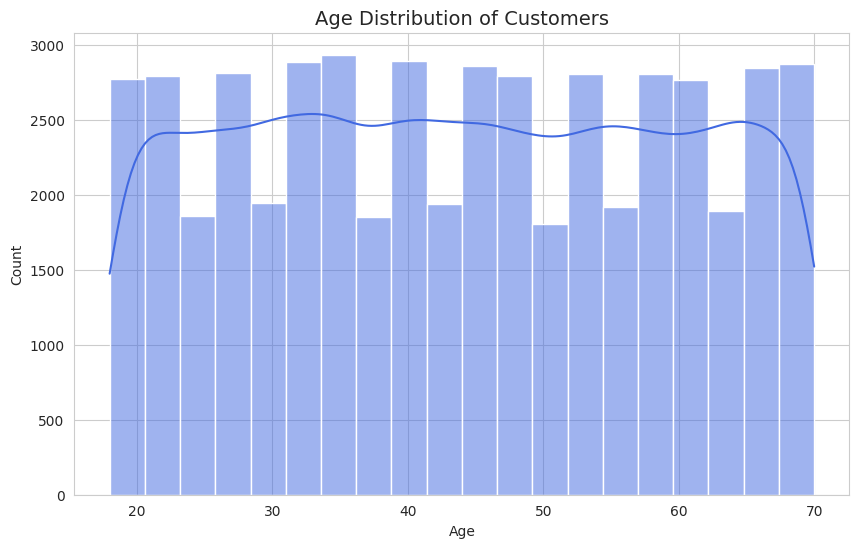

In [14]:
plt.figure()
sns.histplot(df['age'], bins=20, kde=True, color='royalblue')
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

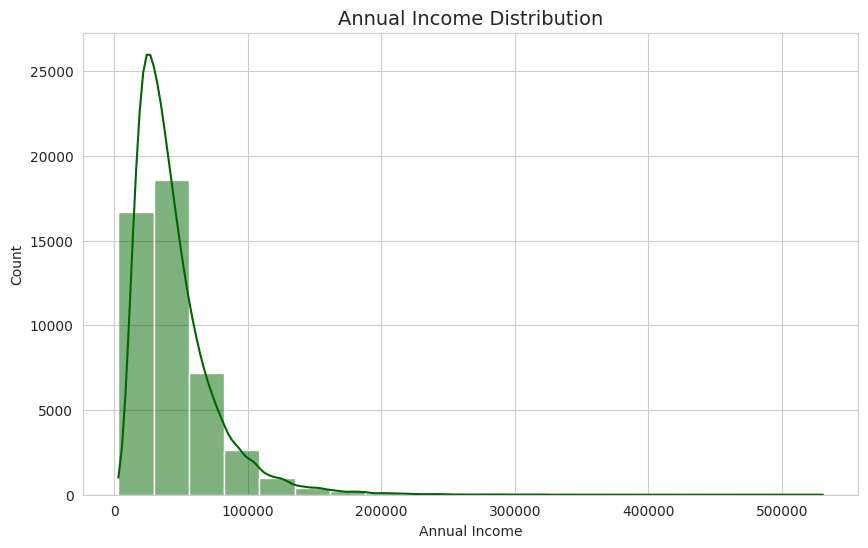

In [15]:
plt.figure()
sns.histplot(df['annual_income'], bins=20, kde=True, color='darkgreen')
plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

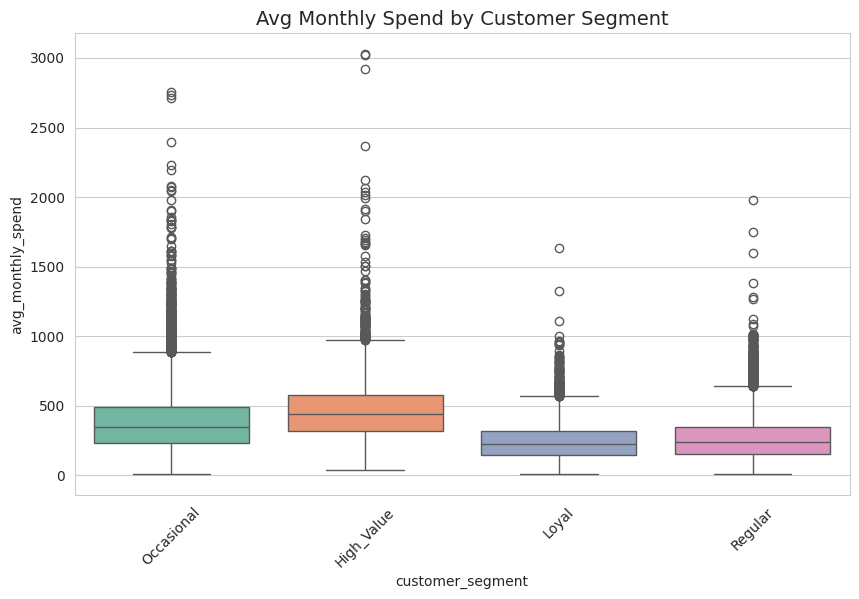

In [16]:
plt.figure()
sns.boxplot(x='customer_segment', y='avg_monthly_spend', data=df, palette='Set2')
plt.title('Avg Monthly Spend by Customer Segment', fontsize=14)
plt.xticks(rotation=45)
plt.show()

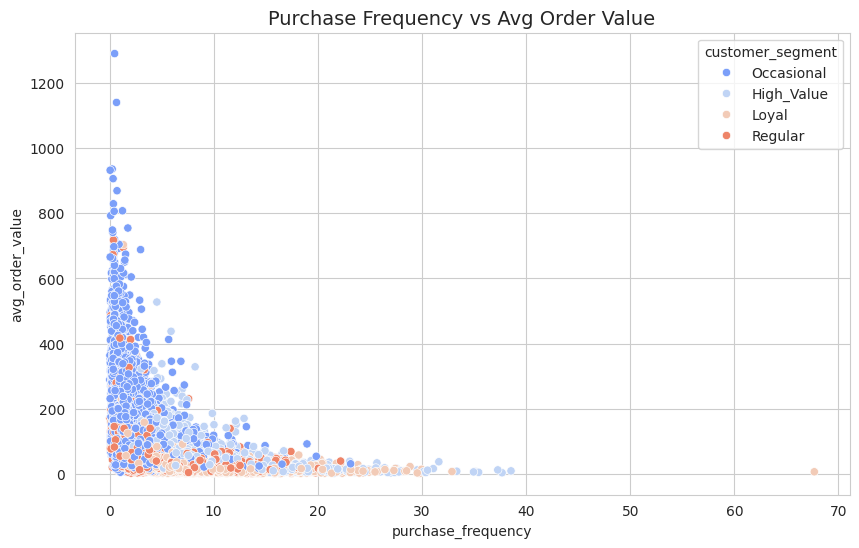

In [17]:
plt.figure()
sns.scatterplot(
    x='purchase_frequency',
    y='avg_order_value',
    hue='customer_segment',
    palette='coolwarm',
    data=df
)
plt.title('Purchase Frequency vs Avg Order Value', fontsize=14)
plt.show()

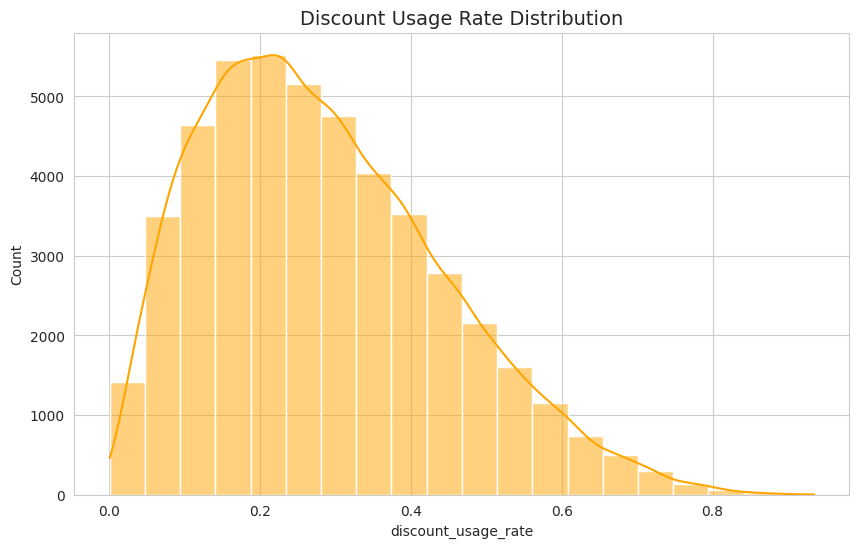

In [18]:
plt.figure()
sns.histplot(df['discount_usage_rate'], bins=20, kde=True, color='orange')
plt.title('Discount Usage Rate Distribution', fontsize=14)
plt.show()

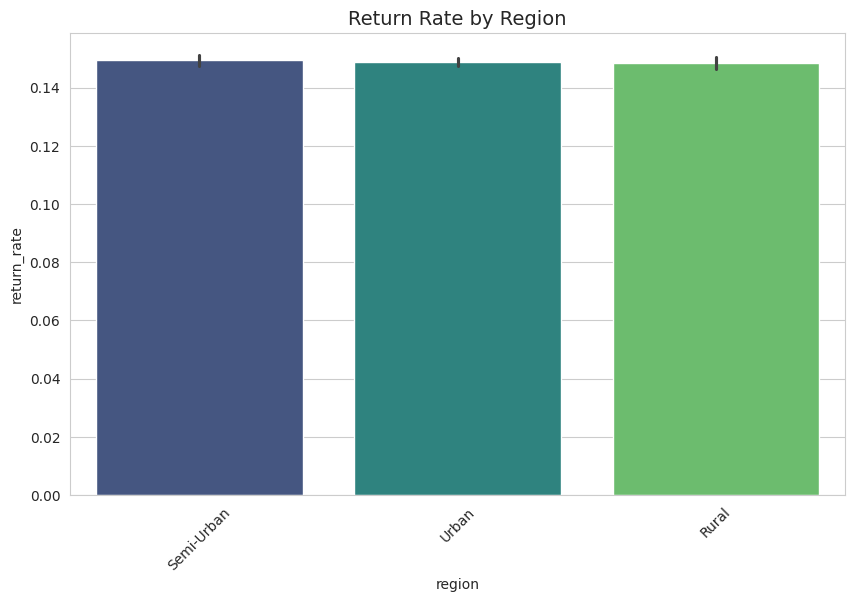

In [19]:
plt.figure()
sns.barplot(x='region', y='return_rate', data=df, palette='viridis')
plt.title('Return Rate by Region', fontsize=14)
plt.xticks(rotation=45)
plt.show()

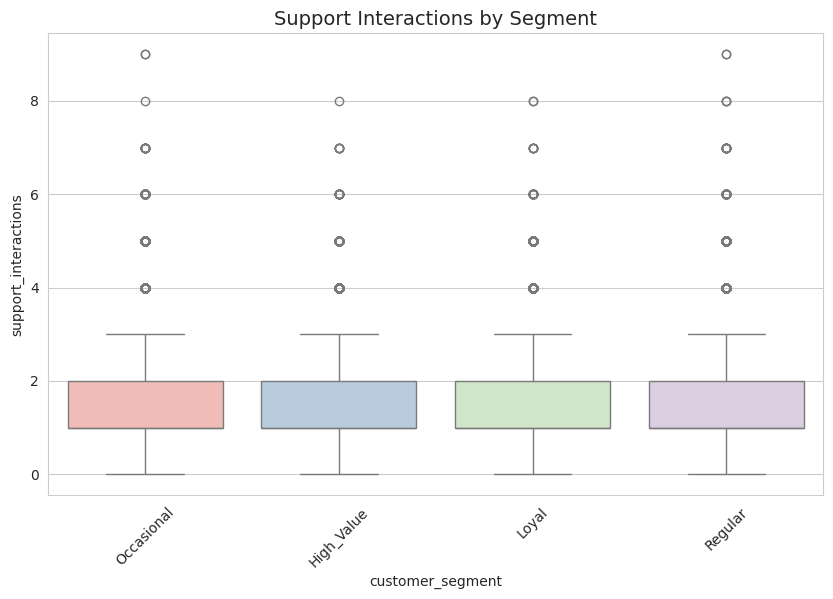

In [20]:
plt.figure()
sns.boxplot(x='customer_segment', y='support_interactions', data=df, palette='Pastel1')
plt.title('Support Interactions by Segment', fontsize=14)
plt.xticks(rotation=45)
plt.show()

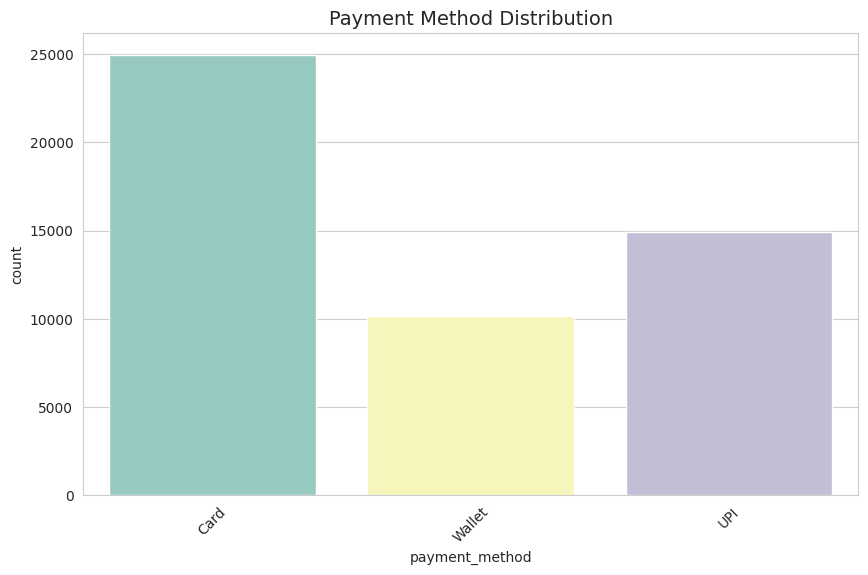

In [21]:
plt.figure()
sns.countplot(x='payment_method', data=df, palette='Set3')
plt.title('Payment Method Distribution', fontsize=14)
plt.xticks(rotation=45)
plt.show()

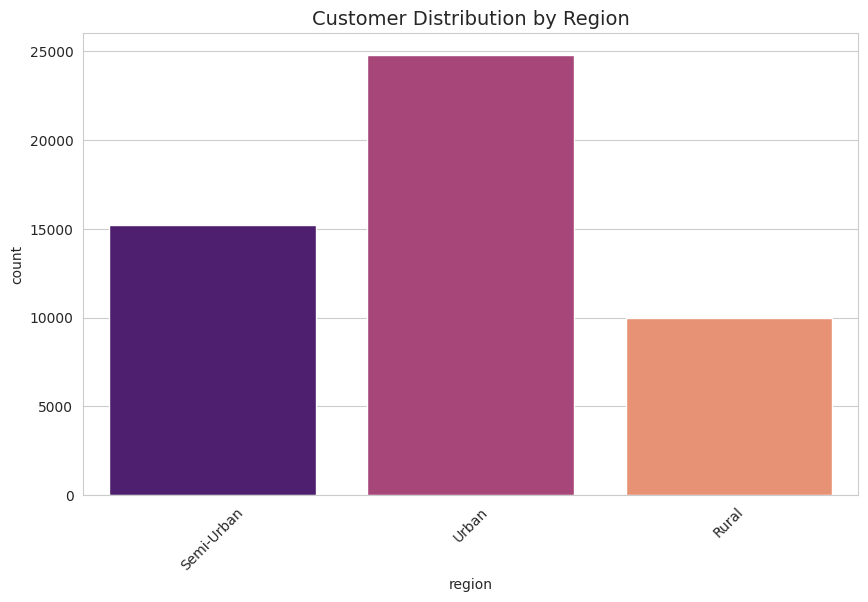

In [22]:
plt.figure()
sns.countplot(x='region', data=df, palette='magma')
plt.title('Customer Distribution by Region', fontsize=14)
plt.xticks(rotation=45)
plt.show()

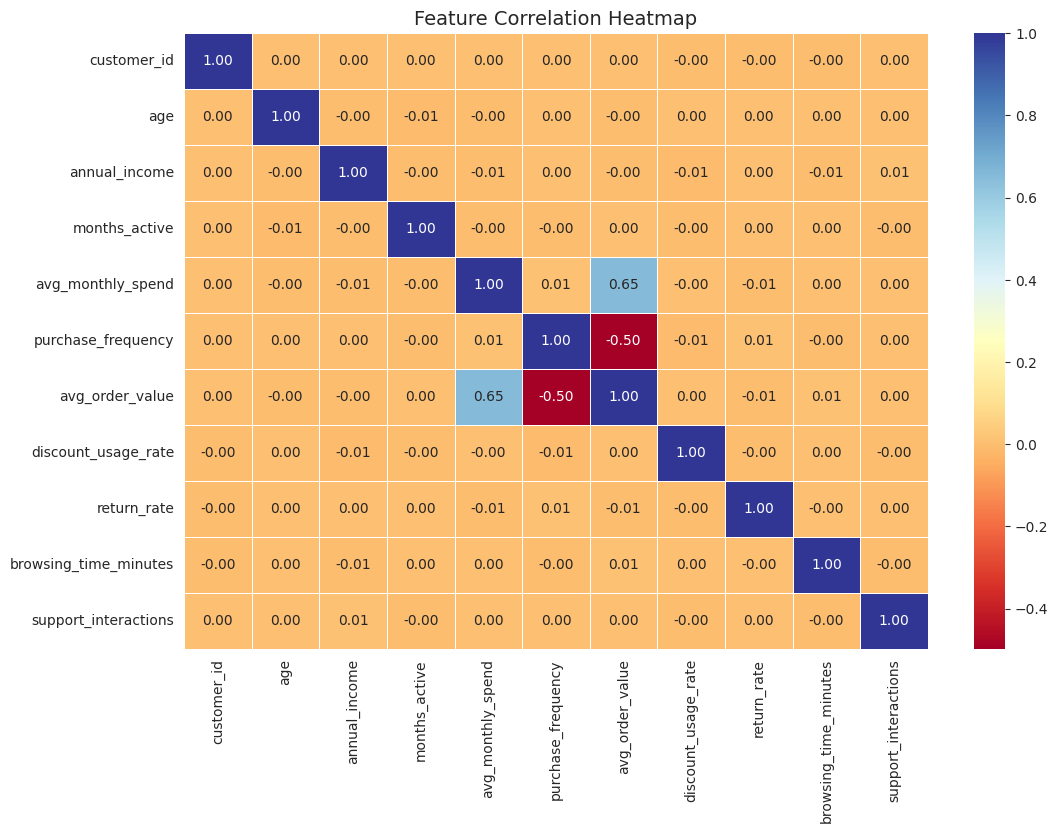

In [23]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='RdYlBu',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

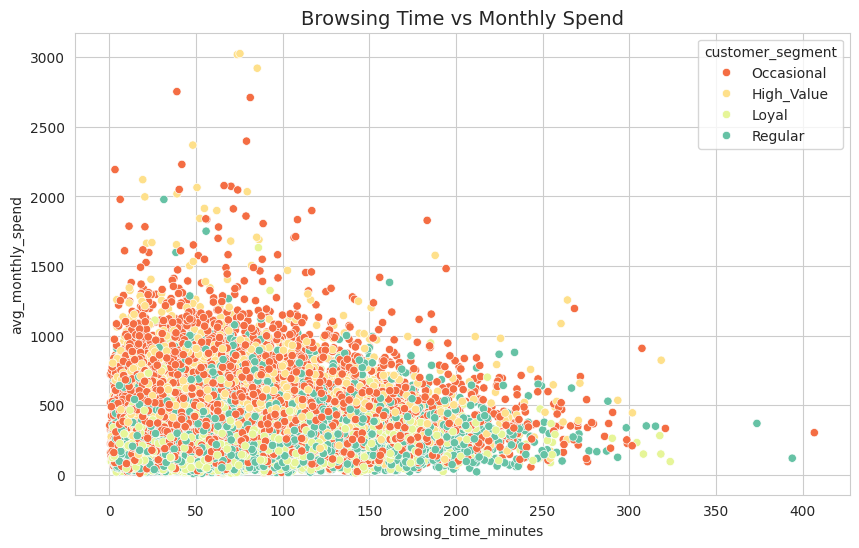

In [24]:
plt.figure()
sns.scatterplot(
    x='browsing_time_minutes',
    y='avg_monthly_spend',
    hue='customer_segment',
    palette='Spectral',
    data=df
)
plt.title('Browsing Time vs Monthly Spend', fontsize=14)
plt.show()

## Feature engg

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier

RANDOM_STATE = 42

In [26]:
print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

df["value_intensity"] = df["avg_order_value"] * df["purchase_frequency"]
df["discount_dependency"] = df["discount_usage_rate"] * df["purchase_frequency"]
df["engagement_ratio"] = df["browsing_time_minutes"] / (df["months_active"] + 1)

print("✔ Composite features added")
print("New Shape:", df.shape)
print(df[["value_intensity","discount_dependency","engagement_ratio"]].head())

FEATURE ENGINEERING
✔ Composite features added
New Shape: (50000, 17)
   value_intensity  discount_dependency  engagement_ratio
0        54.610162             0.095830          1.207787
1       435.465225             0.831134          1.354891
2       194.797008             0.772668          2.675772
3       585.951173             0.582234          2.778482
4       478.096258             0.551766          3.132728


In [27]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

X = df.drop(["customer_segment","customer_id"], axis=1)
y = df["customer_segment"]

classes = sorted(y.unique())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train Size:", X_train.shape)
print("Test Size :", X_test.shape)


TRAIN-TEST SPLIT
Train Size: (40000, 15)
Test Size : (10000, 15)


In [28]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler())
    ]), numeric_cols),
    
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [29]:
print("\n" + "="*70)
print("BASELINE LOGISTIC REGRESSION")
print("="*70)

log_model = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

log_model.fit(X_train, y_train)

log_proba = log_model.predict_proba(X_test)

log_auc = roc_auc_score(
    label_binarize(y_test, classes=classes),
    log_proba,
    multi_class="ovr"
)

print("Logistic Test AUC:", round(log_auc,4))


BASELINE LOGISTIC REGRESSION
Logistic Test AUC: 0.8701


In [30]:
print("\n" + "="*70)
print("CATBOOST MODEL")
print("="*70)

cat_model = Pipeline([
    ("prep", preprocessor),
    ("model", CatBoostClassifier(
        iterations=600,
        depth=6,
        learning_rate=0.05,
        random_state=RANDOM_STATE,
        verbose=0
    ))
])

cat_model.fit(X_train, y_train)

cat_proba = cat_model.predict_proba(X_test)

cat_auc = roc_auc_score(
    label_binarize(y_test, classes=classes),
    cat_proba,
    multi_class="ovr"
)

print("CatBoost Test AUC:", round(cat_auc,4))

if cat_auc > log_auc:
    print("✔ Tree model outperforms linear baseline.")
else:
    print("⚠ Linear model competitive.")


CATBOOST MODEL
CatBoost Test AUC: 0.9193
✔ Tree model outperforms linear baseline.



ROC CURVES COMPARISON


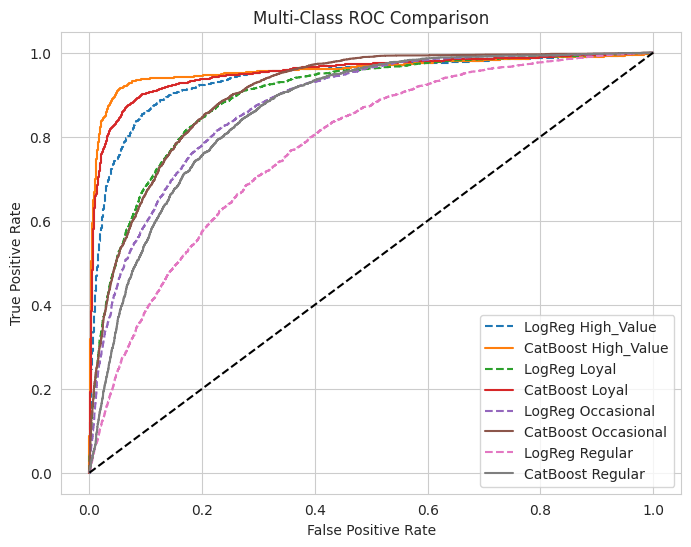

In [31]:
print("\n" + "="*70)
print("ROC CURVES COMPARISON")
print("="*70)

y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    
    fpr_log, tpr_log, _ = roc_curve(y_test_bin[:,i], log_proba[:,i])
    fpr_cat, tpr_cat, _ = roc_curve(y_test_bin[:,i], cat_proba[:,i])
    
    plt.plot(fpr_log, tpr_log, linestyle="--", label=f"LogReg {cls}")
    plt.plot(fpr_cat, tpr_cat, label=f"CatBoost {cls}")

plt.plot([0,1],[0,1],'k--')
plt.title("Multi-Class ROC Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [32]:
print("\n" + "="*70)
print("OOF CROSS VALIDATION")
print("="*70)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

oof_preds = np.zeros((len(X_train), len(classes)))
scores = []

for fold, (tr, vl) in enumerate(skf.split(X_train, y_train), 1):
    
    print(f"\n▶ Fold {fold}")
    
    cat_model.fit(X_train.iloc[tr], y_train.iloc[tr])
    
    preds = cat_model.predict_proba(X_train.iloc[vl])
    
    oof_preds[vl] = preds
    
    auc_score = roc_auc_score(
        label_binarize(y_train.iloc[vl], classes=classes),
        preds,
        multi_class="ovr"
    )
    
    scores.append(auc_score)
    print("Fold AUC:", round(auc_score,4))

print("\nMean OOF AUC:", round(np.mean(scores),4))
print("Std Dev:", round(np.std(scores),4))

global_oof_auc = roc_auc_score(
    label_binarize(y_train, classes=classes),
    oof_preds,
    multi_class="ovr"
)

print("Global OOF AUC:", round(global_oof_auc,4))


OOF CROSS VALIDATION

▶ Fold 1
Fold AUC: 0.9184

▶ Fold 2
Fold AUC: 0.9184

▶ Fold 3
Fold AUC: 0.9148

▶ Fold 4
Fold AUC: 0.9154

▶ Fold 5
Fold AUC: 0.9216

Mean OOF AUC: 0.9177
Std Dev: 0.0024
Global OOF AUC: 0.9176


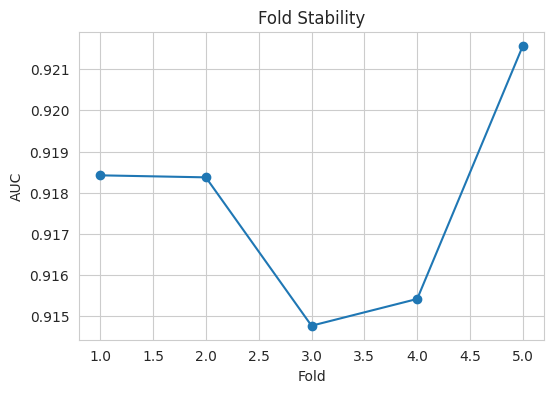

In [33]:
plt.figure(figsize=(6,4))
plt.plot(range(1,6), scores, marker="o")
plt.title("Fold Stability")
plt.xlabel("Fold")
plt.ylabel("AUC")
plt.show()

## thank you...pls upvote!!!